Importing Libraries and data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



Mounting Google drive and improting dataset

In [2]:
from google.colab import drive 
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
dataset = pd.read_csv("/content/gdrive/MyDrive/Fraud.csv")

Exploratory Data Analysis

In [4]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

Droping Unwanted Columns

In [9]:
dataset = dataset.drop('nameOrig',axis=1)
dataset = dataset.drop('nameDest',axis=1)

Handling Categorical Data 

In [10]:
dataset['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dataset['type']= label_encoder.fit_transform(dataset['type'])
  
dataset['type'].unique()

dataset.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


Splitting Dataset into train and test 

In [12]:
y = dataset['isFraud']
x =  dataset.drop("isFraud",axis=1) #feature matrix

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0)

x_train.shape, x_test.shape

((4453834, 8), (1908786, 8))

In [25]:
x_train

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFlaggedFraud
3019524,233,3,15595.97,0.00,0.00,0
1012167,46,3,7613.14,90120.00,0.00,0
5551834,383,4,767351.67,0.00,4528365.13,0
2081309,182,1,167480.81,1293445.15,0.00,0
4457939,323,1,200937.21,104248.00,3242311.66,0
...,...,...,...,...,...,...
2249467,187,1,113691.83,4231.00,397758.64,0
5157699,357,1,3891.96,20146.00,253375.00,0
2215104,186,0,79840.52,10152925.86,276175.87,0
1484405,141,0,568604.50,1081784.28,2631796.49,0


In [27]:
x_test

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFlaggedFraud
4644207,330,0,607193.64,15458649.28,3394537.70,0
3800666,281,3,3473.75,0.00,0.00,0
4426240,322,1,66170.69,32803.00,0.00,0
5788765,401,4,335384.26,197.00,5311958.61,0
2010701,180,0,234392.25,20882.00,0.00,0
...,...,...,...,...,...,...
1359777,138,1,309222.70,20429.00,2792810.80,0
5752193,399,1,251189.54,8593.00,0.00,0
3703453,277,3,1239.84,8071.00,0.00,0
994161,45,3,11670.72,0.00,0.00,0


In [28]:
y_train

3019524    0
1012167    0
5551834    0
2081309    0
4457939    0
          ..
2249467    0
5157699    0
2215104    0
1484405    0
4500015    0
Name: isFraud, Length: 4453834, dtype: int64

In [29]:
y_test

4644207    0
3800666    0
4426240    0
5788765    0
2010701    0
          ..
1359777    0
5752193    0
3703453    0
994161     0
2086021    0
Name: isFraud, Length: 1908786, dtype: int64

Correlation Heatmap to find out correlation to avoid collinearity

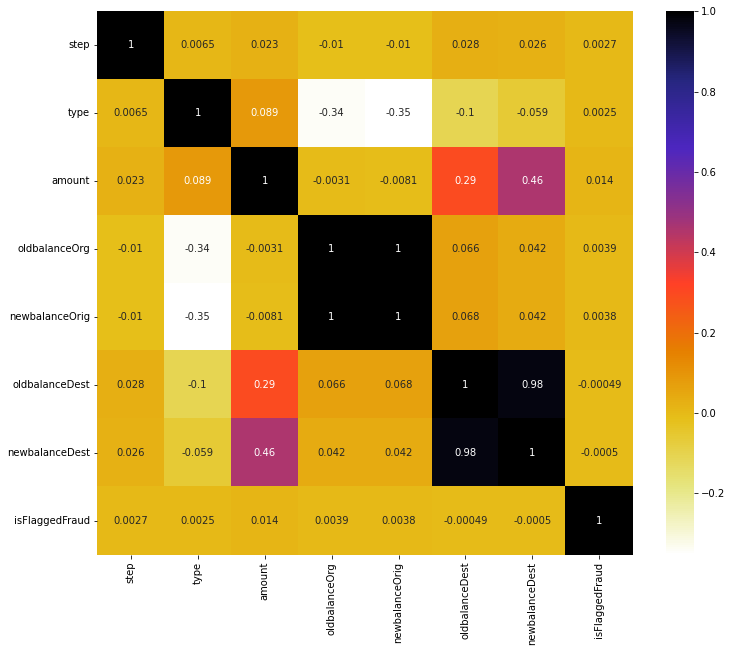

In [14]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [15]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))


2

In [17]:
corr_features

{'newbalanceDest', 'newbalanceOrig'}

In [18]:
x_train = x_train.drop(corr_features,axis=1)
x_test = x_test.drop(corr_features,axis=1)



Building Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
y_pred = classifier.predict(x_test)

Evaluation of the model through Confusion Matrix and the accuracy score 

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1905743     624]
 [    587    1832]]


0.9993655653383878